# CS155 Project 2 
## Basic Visualizations 

# TODO

*  Modify binwidth for each plot 
*  Consider making a violin plot or strip plot

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns 

In [ ]:
data_df = pd.read_csv('https://raw.githubusercontent.com/emiletimothy/Caltech-CS155-2023/main/miniproject2/data/data.csv')
movies_df = pd.read_csv('https://raw.githubusercontent.com/emiletimothy/Caltech-CS155-2023/main/miniproject2/data/movies.csv')

### Plot all movie ratings

In [ ]:
def plot_all_ratings(data_df):
    '''Plots the the ratings from all the movies in the dataset. 

    Args:
        data_df (pd.Dataframe): A dataframe consisting of User IDs, Movie IDs,
            and the corresponding rating.

    '''
    ax = sns.histplot(data_df['Rating'])
    ax.set_title('Ratings of all Movies')
    ax.set_xlabel('Rating')
    ax.set_ylabel('Count')

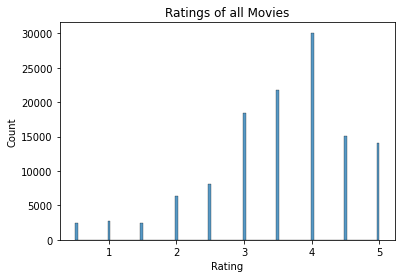

In [ ]:
plot_all_ratings(data_df)

## Plot the ten most popular movies (the ones with the most ratings)

In [ ]:
def plot_most_popular(data_df):
    '''This function returns the ten movies with the most ratings, and it 
    plots their ratings against each other. 

    Args:
        data_df (pd.Dataframe): A dataframe consisting of User IDs, Movie IDs,
            and the corresponding rating.
    
    Returns:
        most_popular (pd.Dataframe): A dataframe consisting of the User IDs, 
            Movie IDs, and corresponding ratings of the ten movies with the 
            most ratings. 

    '''
    # Finds the IDs of the ten most popular movies 
    most_popular_movie_ids = data_df['Movie ID'].value_counts().head(10).keys().tolist()
    # Filters the dataframe for the ten most popular movies and their ratings
    most_popular = data_df[data_df['Movie ID'].isin(most_popular_movie_ids)]
    #Plot the ten most popular movies and their ratings
    ax = sns.histplot(most_popular, x='Rating', hue='Movie ID', element='step')
    ax.set_title('Most Popular Movies and their Ratings')
    sns.move_legend(
        ax, 
        "upper left", 
        bbox_to_anchor=(1, 1),
        title='Movie ID'
    )
    ax.set_xlabel('Rating')
    ax.set_ylabel('Count')
    return most_popular

# Filters the dataframe for the ten most popular movies and their ratings

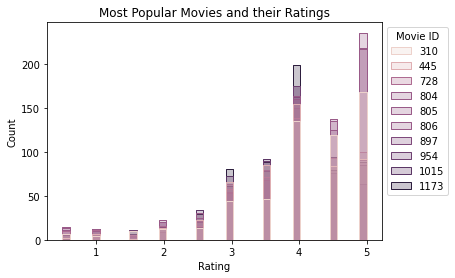

In [ ]:
most_popular = plot_most_popular(data_df)

## Plot the ten best movies (have the highest average ratings)

In [ ]:
def plot_best_movies(data_df):
    '''This function returns the ten movies with the highest average ratings 
    and plots their ratings against each other. 

    Args:
        data_df (pd.Dataframe): A dataframe consisting of User IDs, Movie IDs,
            and the corresponding rating.
    
    Returns:
        best (pd.Dataframe): A dataframe consisting of the User IDs, Movie IDs,
            and corresponding ratings of the ten movies with the highest average
            ratings. 
            
    '''
    # Creates a list of the ten movie IDs with the highest average ratings 
    best_movie_ids = data_df.groupby('Movie ID')\
        .mean().sort_values(by='Rating', ascending=False)\
        .head(10).index.tolist()
    # Finds each of those movies's ratings  
    best = data_df[data_df['Movie ID'].isin(best_movie_ids)]
    # Plotting 
    ax = sns.histplot(best, x='Rating', hue='Movie ID', element='step')
    ax.set_title('Ten Best Movies and their Ratings')
    sns.move_legend(
        ax, 
        "upper left", 
        bbox_to_anchor=(1, 1),
        title='Movie ID'
    )
    ax.set_xlabel('Rating')
    ax.set_ylabel('Count')
    return best

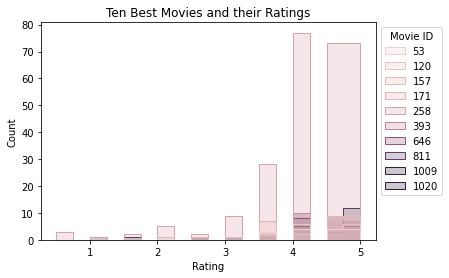

In [ ]:
best_movies = plot_best_movies(data_df)

## Plot ratings of movies from three genres

In [ ]:
def plot_genre_ratings(data_df, movies_df, genre_name):
    '''Given some genre, this function returns a dataframe containing every
    rating for movies in that genre and plots those ratings.

    Args:
        data_df (pd.Dataframe): A dataframe containing the User ID, Movie ID,
            and Rating for that movie 
        movies_df (pd.Dataframe): A row in the dataframe contains the Movie ID, 
            its corresponding title, its genre(s). Columns of the dataframe 
            represent each genre. 
        genre_name (str): The name of the desired genre 
    
    Returns:
        genre_ratings (pd.Dataframe): A dataframe containing the ratings for 
            all movies in the specified genre. 

    '''
    genre_movie_ids = movies_df[movies_df[genre_name] == 1].index.tolist()
    genre_ratings = data_df[data_df['Movie ID'].isin(genre_movie_ids)]
    ax = sns.histplot(genre_ratings, x='Rating')
    ax.set_title(f'{genre_name} Movie Ratings')
    ax.set_xlabel('Rating')
    ax.set_ylabel('Count')
    return genre_ratings

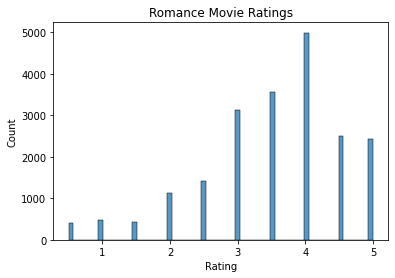

In [ ]:
romance_ratings = plot_genre_ratings(data_df, movies_df, 'Romance')

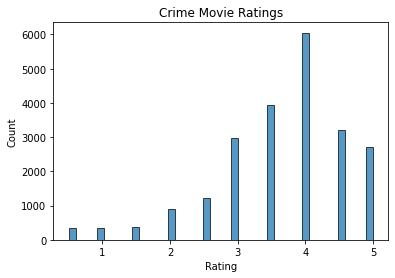

In [ ]:
crime_ratings = plot_genre_ratings(data_df, movies_df, 'Crime')

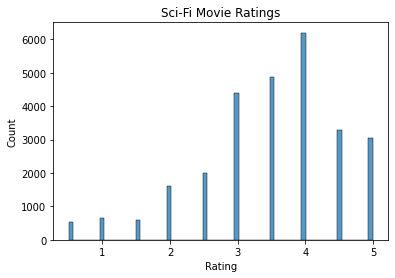

In [ ]:
crime_ratings = plot_genre_ratings(data_df, movies_df, 'Sci-Fi')